In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

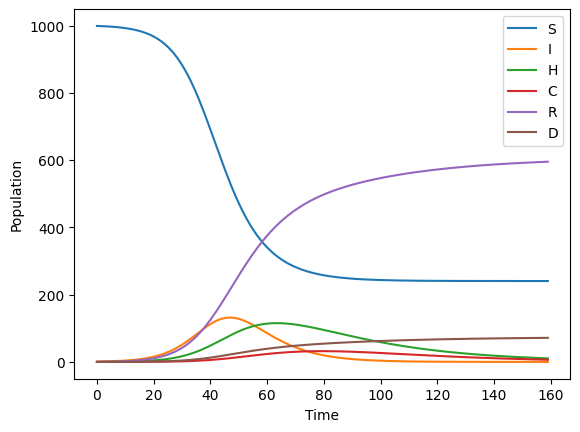

In [9]:
# simulate the following system of epidemics ode
#     dSdt = -(beta * I / N) * S
#     dIdt = (beta * S / N) * I - (gamma + rho + delta) * I
#     dHdt = rho * I - (eta + kappa) * H
#     dCdt = eta * H - (mu + xi) * C
#     dRdt = gamma * I + mu * C
#     dDdt = delta * I + xi * C

# parameters
params = {
    'beta': 0.3,
    'gamma': 0.1,
    'rho': 0.05,
    'delta': 0.01,
    'eta': 0.02,
    'kappa': 0.01,
    'mu': 0.05,
    'xi': 0.01,
    'N': 1000
}

# initial conditions
init_conditions = {
    'S': 999,
    'I': 1,
    'H': 0,
    'C': 0,
    'R': 0,
    'D': 0
}

# time points
t = np.arange(0, 160, 1)

# the system of ODEs
def model(y, t, params):
    S, I, H, C, R, D = y
    beta, gamma, rho, delta, eta, kappa, mu, xi, N = params
    dSdt = -(beta * I / N) * S
    dIdt = (beta * S / N) * I - (gamma + rho + delta) * I
    dHdt = rho * I - (eta + kappa) * H
    dCdt = eta * H - (mu + xi) * C
    dRdt = gamma * I + mu * C
    dDdt = delta * I + xi * C
    return [dSdt, dIdt, dHdt, dCdt, dRdt, dDdt]

# solve ODEs using runge-kutta 4th order method
y = odeint(model, [init_conditions['S'], init_conditions['I'], init_conditions['H'], init_conditions['C'], init_conditions['R'], init_conditions['D']], t, args=(list(params.values()),))

# plot results
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['S', 'I', 'H', 'C', 'R', 'D'])
plt.show()


In [14]:
# write the symbolic representation of the system of ODEs
from sympy import symbols, Function, Eq, Derivative

S, I, H, C, R, D = symbols('S I H C R D', cls=Function)
t = symbols('t')
beta, gamma, rho, delta, eta, kappa, mu, xi, N = symbols('beta gamma rho delta eta kappa mu xi N')
dSdt = Derivative(S(t), t) + (beta * I(t) / N) * S(t)
dIdt = Derivative(I(t), t) - (beta * S(t) / N) * I(t) + (gamma + rho + delta) * I(t)
dHdt = Derivative(H(t), t) - rho * I(t) + (eta + kappa) * H(t)
dCdt = Derivative(C(t), t) - eta * H(t) + (mu + xi) * C(t)
dRdt = Derivative(R(t), t) - gamma * I(t) - mu * C(t)
dDdt = Derivative(D(t), t) - delta * I(t) - xi * C(t)

eq1 = Eq(dSdt, 0)
eq2 = Eq(dIdt, 0)
eq3 = Eq(dHdt, 0)
eq4 = Eq(dCdt, 0)
eq5 = Eq(dRdt, 0)
eq6 = Eq(dDdt, 0)

print(eq1)
print(eq2)
print(eq3)
print(eq4)
print(eq5)
print(eq6)



Eq(Derivative(S(t), t) + beta*I(t)*S(t)/N, 0)
Eq((delta + gamma + rho)*I(t) + Derivative(I(t), t) - beta*I(t)*S(t)/N, 0)
Eq(-rho*I(t) + (eta + kappa)*H(t) + Derivative(H(t), t), 0)
Eq(-eta*H(t) + (mu + xi)*C(t) + Derivative(C(t), t), 0)
Eq(-gamma*I(t) - mu*C(t) + Derivative(R(t), t), 0)
Eq(-delta*I(t) - xi*C(t) + Derivative(D(t), t), 0)


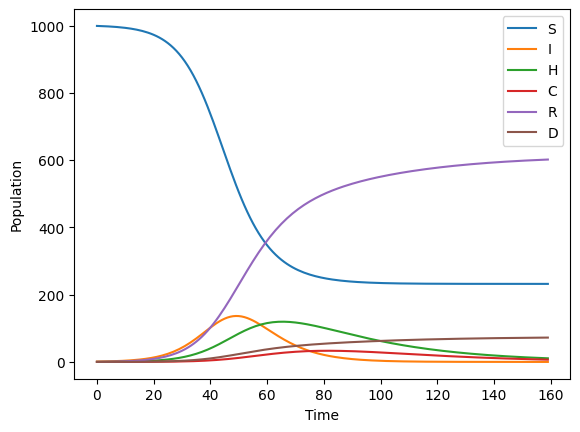

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def discrete_model(y, t, params, dt):
    S, I, H, C, R, D = y
    beta, gamma, rho, delta, eta, kappa, mu, xi, N = params
    
    # Calculate derivatives
    dSdt = -(beta * I / N) * S
    dIdt = (beta * S / N) * I - (gamma + rho + delta) * I
    dHdt = rho * I - (eta + kappa) * H
    dCdt = eta * H - (mu + xi) * C
    dRdt = gamma * I + mu * C
    dDdt = delta * I + xi * C
    
    # Update each compartment
    S_new = S + dt * dSdt
    I_new = I + dt * dIdt
    H_new = H + dt * dHdt
    C_new = C + dt * dCdt
    R_new = R + dt * dRdt
    D_new = D + dt * dDdt
    
    return [S_new, I_new, H_new, C_new, R_new, D_new]

params = {
    'beta': 0.3,
    'gamma': 0.1,
    'rho': 0.05,
    'delta': 0.01,
    'eta': 0.02,
    'kappa': 0.01,
    'mu': 0.05,
    'xi': 0.01,
    'N': 1000
}

init_conditions = {
    'S': 999,
    'I': 1,
    'H': 0,
    'C': 0,
    'R': 0,
    'D': 0
}

# Time points
dt = 1
t = np.arange(0, 160, dt)

# Simulate the model
y = np.zeros((len(t), 6))
y[0, :] = [init_conditions['S'], init_conditions['I'], init_conditions['H'], init_conditions['C'], init_conditions['R'], init_conditions['D']]
for i in range(1, len(t)):
    y[i, :] = discrete_model(y[i-1, :], t[i], list(params.values()), dt)
    
# Plot results
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['S', 'I', 'H', 'C', 'R', 'D'])
plt.show()